## Importing Packages

In [1]:
# Libraries for data loading, data manipulation
import pandas as pd
import numpy as np

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
from wordcloud import WordCloud
from statsmodels.graphics.correlation import plot_corr


#Libraries to clean the text
import contractions #This expands contraction such as 'don't' to 'do not'
import regex as re
import emoji #allows us to manipulate with emojis
from sklearn.preprocessing import LabelEncoder


#Libraries for test pre-processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


#Libraries for Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

# Libraries for mathematical analyses
import numpy as np

#Library for creating pickle files of the models
import pickle

## Loading the Data

In [2]:
train_df = pd.read_csv('train_set.csv')

In [3]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
train_df.shape

(33000, 2)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [6]:
train_df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:title={'center':'Language Distribution'}>

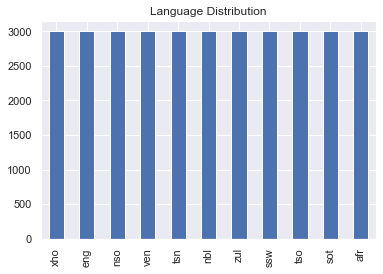

In [7]:
train_df['lang_id'].value_counts(ascending = True).plot(kind = 'bar', title = 'Language Distribution')

In [8]:
len(train_df['lang_id'].unique())

11

In [9]:
len(train_df['text'].unique())

29948

In [10]:
train_df[train_df.duplicated(['text'])].shape

(3052, 2)

In [11]:
train_df.isna().sum()

lang_id    0
text       0
dtype: int64

## Feature Engineering

### Splitting Features

In [12]:
X = train_df['text']
y = train_df['lang_id']
X.shape

(33000,)

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
def define(text):
    data_list = []
    # iterating through all the text
    for t in text:
       # removing the symbols and numbers
        t = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', t)
        t = re.sub(r'[[]]', ' ', t)
        # converting the text to lower case
        t = t.lower()
        # appending to data_list
        data_list.append(t)
    data = ''.join(data_list)
    return data

In [15]:
data = train_df['text'].apply(lambda c: define(c))

In [16]:
#tf = TfidfVectorizer()
#tf.fit(data)
#X = tf.transform(data)

In [17]:
cv = CountVectorizer()
X = cv.fit_transform(data)
X.shape

(33000, 105196)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(26400, 105196)

## Modelling

### SVC

In [281]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

In [282]:
y_pred1 = model.predict(X_test)

In [283]:
ac = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)

print("Accuracy is :",ac)

### Multinomial Naive Bayes

In [295]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

MultinomialNB()

In [296]:
y_pred = mb.predict(X_test)

In [297]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9995454545454545


## Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [315]:
y_pred2 = forest.predict(X_test)

In [316]:
ac = accuracy_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)

print("Accuracy is :",ac)

Accuracy is : 0.99


## Stacking Classifier

In [45]:
#from sklearn.ensemble import StackingClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import make_pipeline
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import LinearSVC
#from sklearn.naive_bayes import MultinomialNB

#estimators = [('forest', RandomForestClassifier(n_estimators=20, random_state=42)),
 #             ('mb', LogisticRegression()),
  #            ('svc', SVC(kernel='rbf'))] #make_pipeline(
                           #LinearSVC(random_state=42)))]

#sc = StackingClassifier(estimators=estimators, final_estimator=MultinomialNB())
#sc.fit(X_train, y_train)

In [43]:
y_pred3 = sc.predict(X_test)

ac = accuracy_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)

print("Accuracy is :",ac)

Accuracy is : 0.998030303030303


## Kaggle Submissions

In [287]:
#Load test data

test_df = pd.read_csv('test_set.csv')
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [288]:
test_data = test_df['text']
test_data.head()

0    Mmasepala, fa maemo a a kgethegileng a letlele...
1    Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2           Tshivhumbeo tshi fana na ngano dza vhathu.
3    Kube inja nelikati betingevakala kutsi titsini...
4                        Winste op buitelandse valuta.
Name: text, dtype: object

In [289]:
test_data.shape

(5682,)

In [290]:
test_data = test_df['text'].apply(lambda c: define(c))

In [317]:
test = tf.transform(test_data)

In [319]:
pred = forest.predict(test)
b = le.inverse_transform(pred)
sub_id = test_df['index'].to_list()
sub_pred = b.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

submission_df.to_csv('forest_Submission.csv')